## Assignment 1 - Classification


## Learning Outcomes


* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month. We will be using the better of 2 classifiers namely, Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.


In [2]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


**Questions (12 marks total)**

Q1.  Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

You will build a classification model for this default of credit card clients dataset.  The objective is to predict whether or not a credit card client will default for their payment in the next month.

Make sure you perform your analyses and answer the questions in sections below:

1. Data exploration:  ( 3 marks) 

    - Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
    
2. Data Preprocessing: (4 marks)

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default

3. Classification: (5 marks)

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
          
       b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [3]:
### Your code here
import os
## Feel free to use multiple cells  and continue from here:

df = pd.read_excel("default of credit card clients.xls", skiprows= 1, header = 0)

#Make copy to explore data
df_explore = df.copy()

##1. Data Exploration - See information about dataset

In [4]:
df_explore.shape

(30000, 25)

In [7]:
df_explore.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [13]:
#view unchanged data sample
df_explore.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [8]:
#Divide columns based on dtype
dep_var = ['default payment next month']
categorical_vars = ['ID', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
discrete_vars = ['LIMIT_BAL', 'AGE']
continuous_vars = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [12]:
#Quantitative Features
df_explore.loc[:, dep_var + discrete_vars + continuous_vars].describe()

default payment next month       LIMIT_BAL           AGE  \
count                30000.000000    30000.000000  30000.000000   
mean                     0.221200   167484.322667     35.485500   
std                      0.415062   129747.661567      9.217904   
min                      0.000000    10000.000000     21.000000   
25%                      0.000000    50000.000000     28.000000   
50%                      0.000000   140000.000000     34.000000   
75%                      0.000000   240000.000000     41.000000   
max                      1.000000  1000000.000000     79.000000   

           BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4  \
count   30000.000000   30000.000000  3.000000e+04   30000.000000   
mean    51223.330900   49179.075167  4.701315e+04   43262.948967   
std     73635.860576   71173.768783  6.934939e+04   64332.856134   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3558.750000    2984.750000  2.666250e+03    2326.750000   
50%     22381.500000   21200.000000  2.008850e+04   19052.000000   
75%     67091.000000   64006.250000  6.016475e+04   54506.000000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

           BILL_AMT5      BILL_AMT6       PAY_AMT1      PAY_AMT2  \
count   30000.000000   30000.000000   30000.000000  3.000000e+04   
mean    40311.400967   38871.760400    5663.580500  5.921163e+03   
std     60797.155770   59554.107537   16563.280354  2.304087e+04   
min    -81334.000000 -339603.000000       0.000000  0.000000e+00   
25%      1763.000000    1256.000000    1000.000000  8.330000e+02   
50%     18104.500000   17071.000000    2100.000000  2.009000e+03   
75%     50190.500000   49198.250000    5006.000000  5.000000e+03   
max    927171.000000  961664.000000  873552.000000  1.684259e+06   

           PAY_AMT3       PAY_AMT4       PAY_AMT5       PAY_AMT6  
count   30000.00000   30000.000000   30000.000000   30000.000000  
mean     5225.68150    4826.076867    4799.387633    5215.502567  
std     17606.96147   15666.159744   15278.305679   17777.465775  
min         0.00000       0.000000       0.000000       0.000000  
25%       390.00000     296.000000     252.500000     117.750000  
50%      1800.00000    1500.000000    1500.000000    1500.000000  
75%      4505.00000    4013.250000    4031.500000    4000.000000  
max    896040.00000  621000.000000  426529.000000  528666.000000

In [14]:
#Double checking
df_explore.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

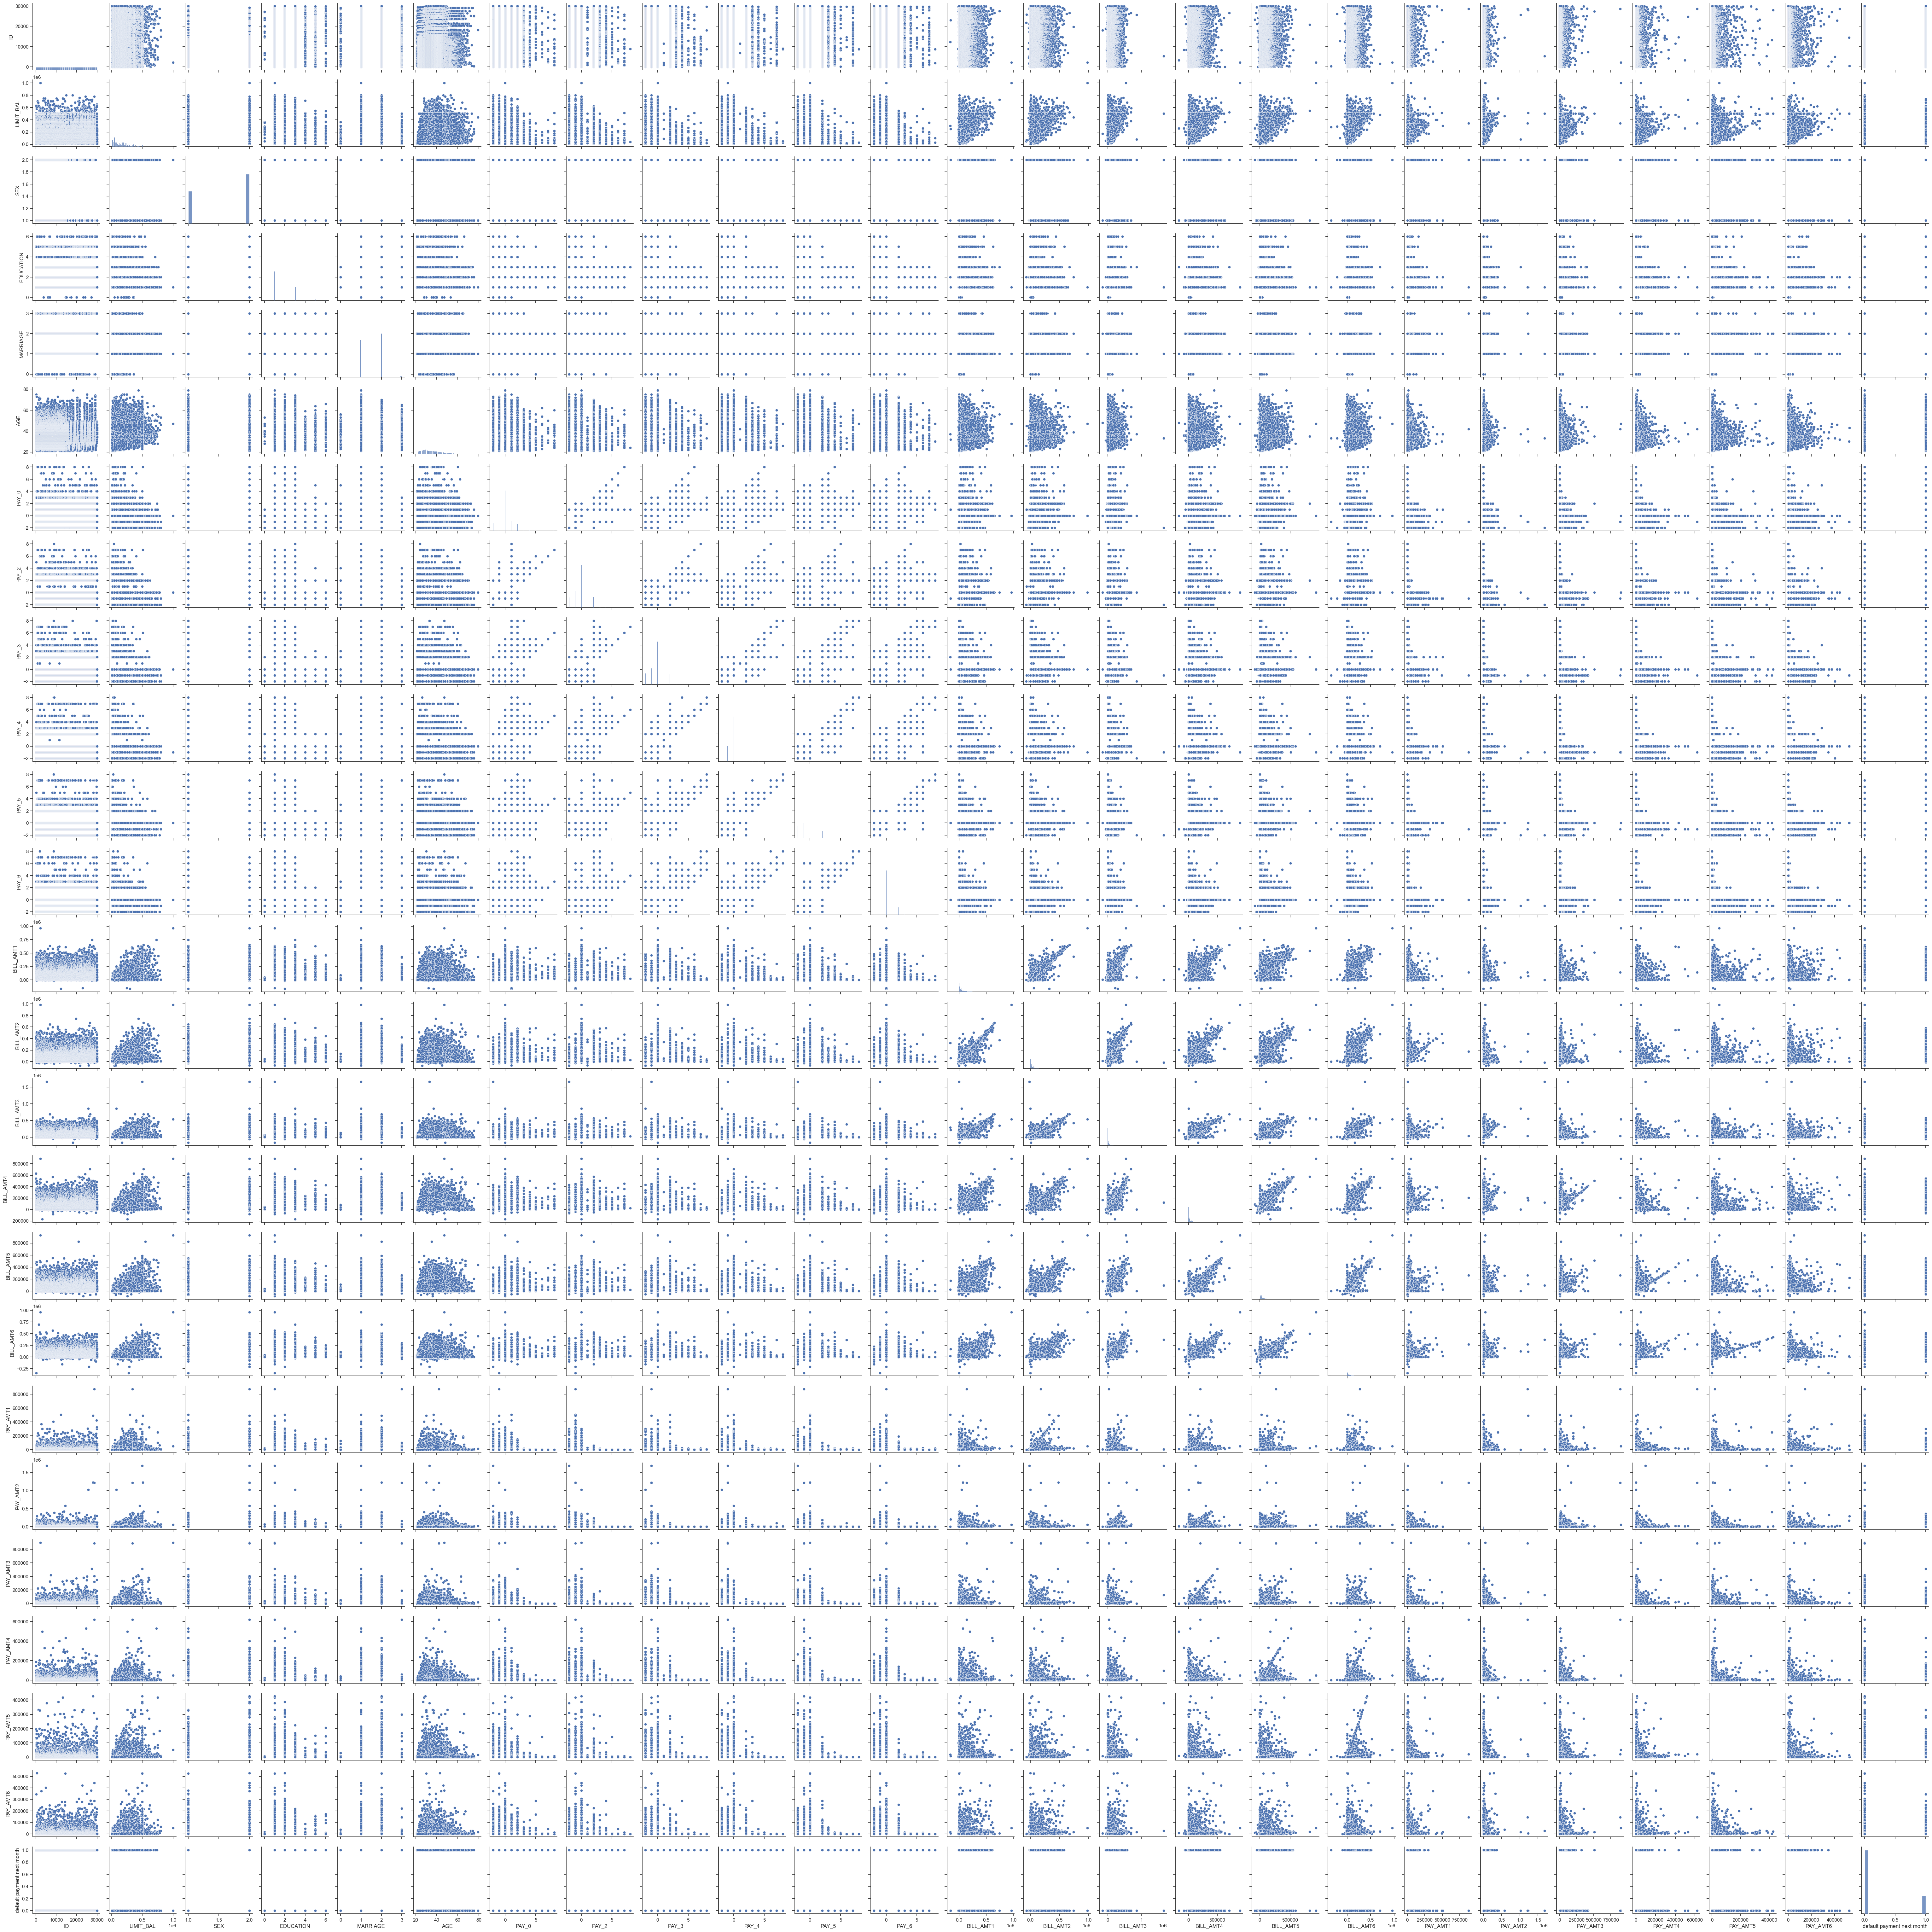

In [22]:
#Plot data
sns.set(style='ticks')
sns.pairplot(df_explore)
plt.show()

In [33]:
##2. Data PreProcessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [17]:
#Features should not have any missing values.
#Checking to see any na values
#Because no na values are present in the dataset, no na cleanup/replacements need to occur
print(df_explore.columns[df_explore.isna().any()].tolist())

#Imputer - if no value is found, replace with median - only for future use as this data has no NaN values
#For categorical values
cat_steps = [('si', SimpleImputer(strategy='median')), ('scale', StandardScaler())]
cat_pipe = Pipeline(cat_steps)
cat_transformer = [('cat', cat_pipe, categorical_vars)]


# Numerical - impute
num_steps = [('si', SimpleImputer(strategy='mean')), ('scale', StandardScaler())]
num_pipe = Pipeline(num_steps)
num_transformer = [('num', num_pipe, discrete_vars + continuous_vars)]

[]


In [ ]:
#All features must be numerical.


In [ ]:
#Features should have the same or similar scales (in particular, range and expected value).
#Done above

In [18]:
#Tranform and Fit data
ct = ColumnTransformer(transformers=cat_transformer + num_transformer)
ct.fit(df_explore[categorical_vars + discrete_vars + continuous_vars])
X = ct.transform(df_explore[categorical_vars + discrete_vars + continuous_vars])

y = df_explore[['default payment next month']]

In [19]:
#Set random seed to 123 and split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24000, 24) (6000, 24) (24000, 1) (6000, 1)


In [26]:
#Use Cross-validation with 5-folds. For other parameters, use default
#Using the two classifiers defined in step 3
#Random Forest
rf_cv_score = cross_val_score(RandomForestClassifier(), X_train, np.ravel(y_train), cv=5)
print('Random Forest Classifier', ' mean accuracy: ', round(rf_cv_score.mean()*100, 3), '% std: ', round(rf_cv_score.var()*100, 3),'%')

#K-Neighbour
kn_cv_score = cross_val_score(KNeighborsClassifier(), X_train, np.ravel(y_train), cv=5)
print('K-Nearest-Neighbours', ' mean accuracy: ', round(kn_cv_score.mean()*100, 3), '% std: ', round(kn_cv_score.var()*100, 3),'%')


Random Forest Classifier  mean accuracy:  81.725 % std:  0.003 %
K-Nearest-Neighbours  mean accuracy:  79.304 % std:  0.002 %


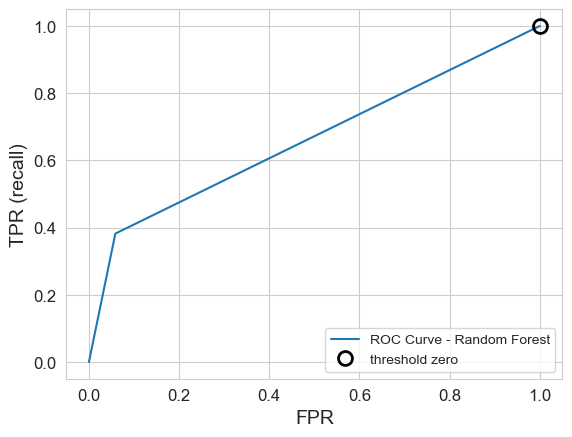

In [29]:
##3. Classification
#Study the ROC Curve, decide threshold
from sklearn.metrics import roc_curve, auc

#Fit models with data
#Random Forest - fit
final_model_rfc = RandomForestClassifier().fit(X_train, np.ravel(y_train))
y_prob_rfc = final_model_rfc.predict(X_test)

#ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rfc)

plt.plot(fpr, tpr, label="ROC Curve - Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show()

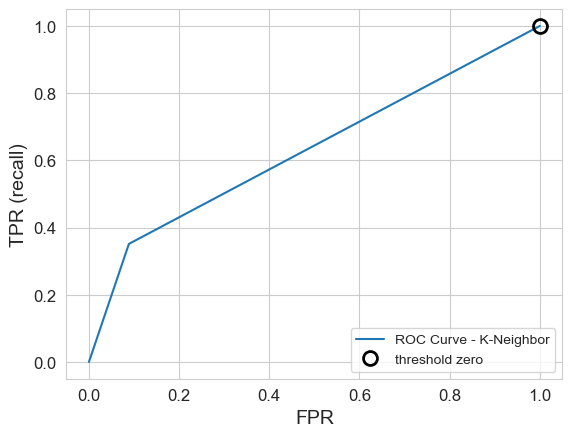

In [31]:
# K-Neighbor - fit + ROC
final_model_knc = KNeighborsClassifier().fit(X_train, np.ravel(y_train))
y_prob_knc = final_model_knc.predict(X_test)

#ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_knc)

plt.plot(fpr, tpr, label="ROC Curve - K-Neighbor")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.show()

Based off of these ROC curves defined above, wanting to keep true positive rates high and false positive rates low, a threshold of around 0.39 to 0.4 could be optimal for the Random Forest Classifier ROC curve. For the K-Neighbor Classifier ROC curve, a threshold of around 0.37 to 0.39 would be optimal.

In [41]:
##Tuning - Random Forest
estimators_rfc = {'n_estimators': [4, 5, 10, 20, 50]} #Needs to be a Dict
grid_search_rfc = GridSearchCV(RandomForestClassifier(), estimators_rfc, cv=5, scoring='roc_auc')
grid_search_rfc.fit(X_train, np.ravel(y_train))

calcs_rfc = pd.DataFrame(grid_search_rfc.cv_results_)
auc_rfc = grid_search_rfc.best_score_
best_estimator_rfc = grid_search_rfc.best_params_['n_estimators']

print("Random Forest - Best Estimator:", best_estimator_rfc, "    AUC value:", auc_rfc)

Random Forest - Best Estimator:  50     AUC value:  0.7595759907908031


In [46]:
##Tuning - K-Neighbor
neighbors_knc = {'n_neighbors': [3, 5, 10, 20]} #Needs to be a Dict
grid_search_knc = GridSearchCV(KNeighborsClassifier(), neighbors_knc, cv=5, scoring='roc_auc')
grid_search_knc.fit(X_train, np.ravel(y_train))

calcs_knc = pd.DataFrame(grid_search_knc.cv_results_)
auc_knc = grid_search_knc.best_score_
best_neighbor_knc = grid_search_knc.best_params_['n_neighbors']

print("K-Neighbors - Best Neighbor:", best_neighbor_knc, "    AUC value:", auc_knc)

K-Neighbors - Best Neighbor: 20     AUC value: 0.7356347766206426


#### Conclusions 
(3 marks)

Explain your results and choices

From these results it can be presumed that the Random Forest Classifier is a better measure for accuracy with a higher percentage of mean accuracy and a standard deviation of 0.005%, where 81.725% mean accuracy for Random Forest Classifier is greater than the 79.304% for K-Neighbors Classifiers, in the cross-validation step.

Upon fitting the transformed data to the two models and viewing their ROC curves, the AUC value for Random Forest Classifier is also greater, indicating a, slightly, higher true positive to false positive rate. This is seen as the best ROC AUC value, for best estimator 50, is 0.76 (2rf) which is greater than the best ROC AUC value, for best neighbor 20, with a value of 0.74 (2rf).

Because of the higher threshold values determined from the Random Forest Cassifier tree, along with the outperformance in cross validation, as well as the higher AUC score, it can be deduced that the Random Forest model is a better predictor of the two models tested.